<a href="https://colab.research.google.com/github/tania-sultana-tamanna/Bangla-Chatbot-Using-NLP/blob/main/%E0%A6%AC%E0%A7%8D%E0%A6%AF%E0%A6%BE%E0%A6%82%E0%A6%AC%E0%A6%9F_Bangla_Chatbot_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow sklearn pandas numpy matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


#import python packages

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D

#Read dataset as json file

In [ ]:
with open("Intent.json") as diabetes_dataset:
  dataset = json.load(diabetes_dataset)

In [ ]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      tags.append(intent['intent'])
  return [tags, inputs, responses]

In [ ]:
[tags, inputs, responses] = processing_json_dataset(dataset)

#dataset as DataFrame

In [ ]:
dataset = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
dataset.head()

,inputs,tags
0,এই যে,Greetings
1,হেলো,Greetings
2,হ্যালো,Greetings
3,হাই,Greetings
4,হে,Greetings


In [ ]:
dataset = dataset.sample(frac=1)

In [ ]:
dataset.head()

,inputs,tags
57,আমি কি বলতে চাচ্ছি তা কি আপনি বুঝতে পেরেছেন,UnderstandQuery
35,আপনার আসল নাম বলুন?,RealNameQuery
66,যথেষ্ট কথা বলা,Shutup
54,আজকে আমার মন খারাপ,Jokes
52,আজকে আমার মন ভাল নেই,Jokes


#Pre-processing text of dataset

In [ ]:
import string
dataset['inputs'] = dataset['inputs'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [ ]:
dataset.head()

,inputs,tags
57,"[আ, ম, ি, , ক, ি, , ব, ল, ত, ে, , চ, া, চ, ...",UnderstandQuery
35,"[আ, প, ন, া, র, , আ, স, ল, , ন, া, ম, , ব, ...",RealNameQuery
66,"[য, থ, ে, ষ, ্, ট, , ক, থ, া, , ব, ল, া]",Shutup
54,"[আ, জ, ক, ে, , আ, ম, া, র, , ম, ন, , খ, া, ...",Jokes
52,"[আ, জ, ক, ে, , আ, ম, া, র, , ম, ন, , ভ, া, ...",Jokes


In [ ]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))

In [ ]:
dataset.head()

,inputs,tags
57,আমি কি বলতে চাচ্ছি তা কি আপনি বুঝতে পেরেছেন,UnderstandQuery
35,আপনার আসল নাম বলুন,RealNameQuery
66,যথেষ্ট কথা বলা,Shutup
54,আজকে আমার মন খারাপ,Jokes
52,আজকে আমার মন ভাল নেই,Jokes


In [ ]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
features = pad_sequences(train)
le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])

In [ ]:
len(features[0])

9

In [ ]:
input_shape = features.shape[1]
print(input_shape)

9


In [ ]:
features.shape

(88, 9)

In [ ]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  109
output length:  13


In [ ]:
tokenizer.word_index

{'কি': 1,
 'আপনার': 2,
 'আপনি': 3,
 'নাম': 4,
 'কথা': 5,
 'ধন্যবাদ': 6,
 'আমি': 7,
 'আমার': 8,
 'আসল': 9,
 'ভাল': 10,
 'তুমি': 11,
 'সাথে': 12,
 'না': 13,
 'বিদায়': 14,
 'মন': 15,
 'কেমন': 16,
 'করে': 17,
 'আছো': 18,
 'করি': 19,
 'কী': 20,
 'বলছি': 21,
 'আমাকে': 22,
 'বলতে': 23,
 'দয়া': 24,
 'আশা': 25,
 'আপনাকে': 26,
 'জন্য': 27,
 'হবে': 28,
 'তোমার': 29,
 'খুব': 30,
 'ঠিক': 31,
 'আছে': 32,
 'হ্যালো': 33,
 'আছেন': 34,
 'করুন': 35,
 'চুপ': 36,
 'তা': 37,
 'বুঝতে': 38,
 'বলুন': 39,
 'আজকে': 40,
 'খারাপ': 41,
 'নেই': 42,
 'বলে': 43,
 'মেয়ে': 44,
 'অবস্থা': 45,
 'পরে': 46,
 'দেখা': 47,
 'জিনিয়াস': 48,
 'শান্ত': 49,
 'হাই': 50,
 'মনে': 51,
 'বুদ্ধিমান': 52,
 'করছেন': 53,
 'খবর': 54,
 'চেষ্টা': 55,
 'পারি': 56,
 'চাচ্ছি': 57,
 'পেরেছেন': 58,
 'যথেষ্ট': 59,
 'বলা': 60,
 'বাই': 61,
 'বন্ধুরা': 62,
 'চতুর': 63,
 'ছিল': 64,
 'কে': 65,
 'তো': 66,
 'পারছেন': 67,
 'হয়': 68,
 'চালাক': 69,
 'একজন': 70,
 'যারা': 71,
 'বন্ধ': 72,
 'জানেন': 73,
 'এই': 74,
 'যে': 75,
 'সাহায্যের': 76,
 'যোগাযোগ': 77

## Build RNN Model

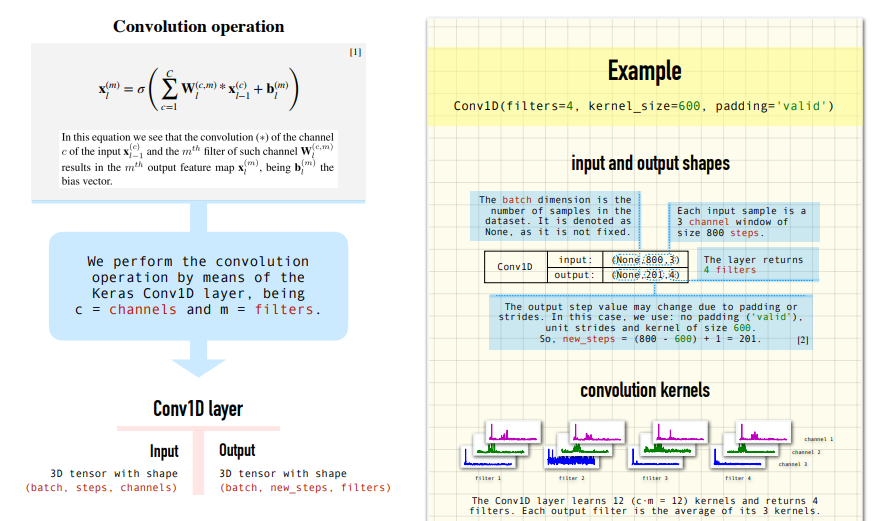

In [ ]:
m = Sequential()
m.add(Input(shape=(features.shape[1])))
m.add(Embedding(vocabulary + 1,100))
m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001)))
m.add(Dropout(0.3))
m.add(LSTM(32, dropout=0.3,return_sequences=True))
m.add(LSTM(16, dropout=0.3,return_sequences=False))
m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001)))
m.add(Dropout(0.6))
m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [ ]:
m.layers

In [ ]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9, 100)            11000     
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             16032     
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm (LSTM)                 (None, 5, 32)             8320      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 400, mode = 'min', restore_best_weights = True)

In [ ]:
history_training = m.fit(features,labels,epochs=2000, batch_size=64, callbacks=[ earlyStopping])

Epoch 1/2000
2/2 [==============================] - 7s 46ms/step - loss: 2.5706 - accuracy: 0.0682
Epoch 2/2000
2/2 [==============================] - 0s 20ms/step - loss: 2.5684 - accuracy: 0.1136
Epoch 3/2000
2/2 [==============================] - 0s 20ms/step - loss: 2.5677 - accuracy: 0.0909
Epoch 4/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.5648 - accuracy: 0.1023
Epoch 5/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.5655 - accuracy: 0.1364
Epoch 6/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.5605 - accuracy: 0.1818
Epoch 7/2000
2/2 [==============================] - 0s 16ms/step - loss: 2.5618 - accuracy: 0.1364
Epoch 8/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.5603 - accuracy: 0.1250
Epoch 9/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.5641 - accuracy: 0.1477
Epoch 10/2000
2/2 [==============================] - 0s 20ms/step - loss: 2.5570 - accuracy: 0.1250
Epoch 11/

In [ ]:
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

<ipython-input-26-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


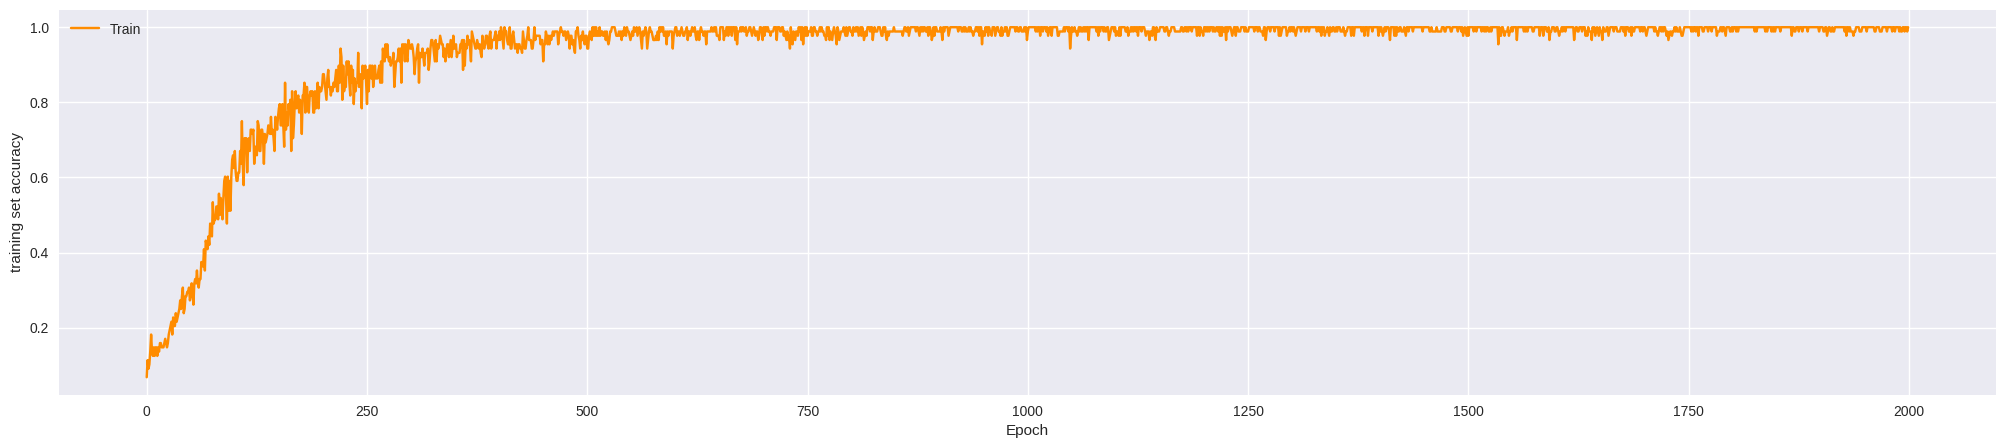

In [ ]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

<ipython-input-26-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


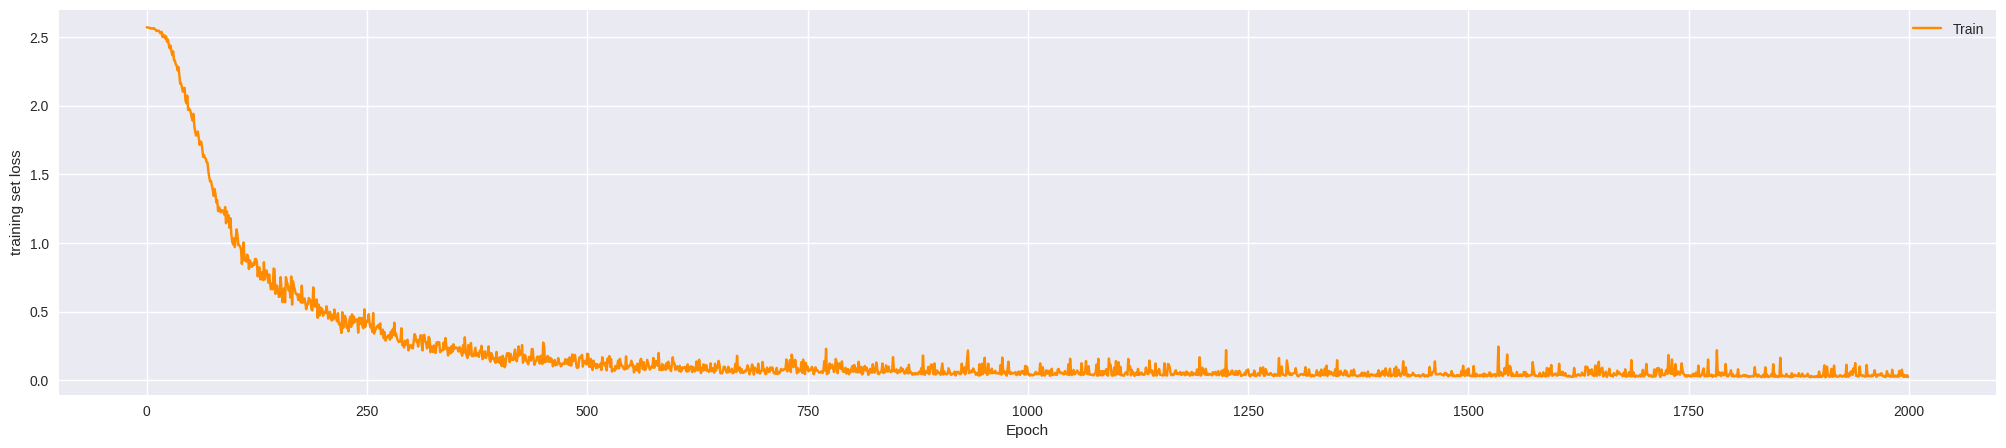

In [ ]:
draw_plot(history_training.history['loss'],'training set loss' )

In [ ]:
m.evaluate(features, labels, batch_size = 64)

2/2 [==============================] - 1s 11ms/step - loss: 0.0193 - accuracy: 1.0000


[0.019328726455569267, 1.0]

#Live Testing

In [ ]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag])

In [ ]:
while True:
  i = str(input())
  print("আমি:  {}".format(i))
  res_tag = generate_answer(i)
  print("বাব: " , res_tag)

আমি:  হ্যালো
1/1 [==============================] - 0s 24ms/step
বাব:  হাই আমি আপনাকে কীভাবে সাহায্য করতে পারি?
আমি:  হাই, আপনি কেমন আছেন?
1/1 [==============================] - 0s 29ms/step
বাব:  আমি খুব ভালো, আপনি কেমন আছেন? 
আমি:  আপনার নাম কি?
1/1 [==============================] - 0s 32ms/step
বাব:  আমাকে ব্যাংবট কল করুন
আমি:  তোমার আসল নাম কি?
1/1 [==============================] - 0s 25ms/step
বাব:  আমার নাম বিটা ব্যাংবট 
আমি:  ঠিক আছে ধন্যবাদ
1/1 [==============================] - 0s 27ms/step
বাব:  আপনার সাথে কথা বলে ভালো লাগলো।
আমি:  আপনার জন্য ছিল না
1/1 [==============================] - 0s 26ms/step
বাব:  ঠিক আছে। আমি দুঃখিত।
আমি:  আমার মন ভাল করার চেষ্টা করুন
1/1 [==============================] - 0s 33ms/step
বাব:  যখন আপনার একা লাগবে, চারদিকে কিছুই দেখতে পাবেন না, দুনিয়া টা ঝাপসা হয়ে আসবে। তখন আমার কাছে আসবেন . . . চোখের ডাক্তার দেখাতে বলব  
আমি:  তুমি কি আমাকে বুঝেছ
1/1 [==============================] - 0s 30ms/step
বাব:  আরেকটু সহজ সাবলীল ভাবে বলার চেষ্টা করুন
আমি:  